# Decision Tree on Titanic dataset

![image.png](attachment:image.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/INSAID/main/titanic.csv")
df.shape

(891, 12)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [5]:
df.drop(['Cabin'], axis=1, inplace=True)
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [6]:
df.Embarked.mode()[0]

'S'

In [7]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

Age            19.86532
PassengerId     0.00000
Survived        0.00000
Pclass          0.00000
Name            0.00000
Sex             0.00000
SibSp           0.00000
Parch           0.00000
Ticket          0.00000
Fare            0.00000
Embarked        0.00000
dtype: float64

In [9]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
df.Age.skew()

0.38910778230082704

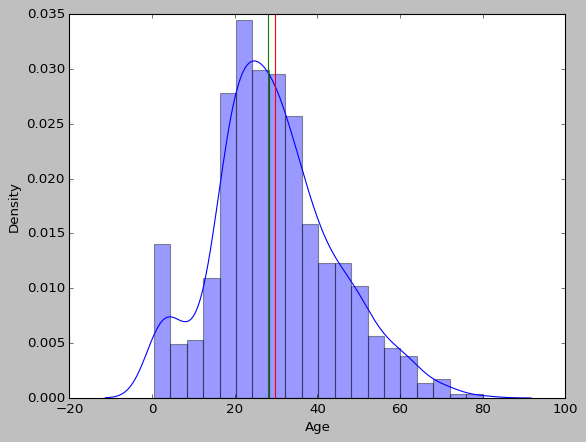

In [11]:
plt.style.use("classic")
sns.distplot(df.Age)
plt.axvline(df.Age.mean(), color='red')
plt.axvline(df.Age.median(),color='green')
plt.show()

In [12]:
df.Age.fillna(df.Age.median(), inplace=True)
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### Feature Engineering

![image.png](attachment:image.png)

In [14]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [15]:
df.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,S,6
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,C,2
168,169,0,1,"Baumann, Mr. John D",male,28.0,0,0,PC 17318,25.9250,S,1
354,355,0,3,"Yousif, Mr. Wazli",male,28.0,0,0,2647,7.2250,C,1


![image.png](attachment:image.png)

In [16]:
df['GenderClass'] = df.apply(lambda x : 'child' if x['Age']<15 else x['Sex'], axis=1)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,male


In [18]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [19]:
df.GenderClass.value_counts()

male      538
female    275
child      78
Name: GenderClass, dtype: int64

In [20]:
78/891*100

8.754208754208754

In [21]:
538/891*100

60.38159371492705

In [22]:
df.GenderClass.value_counts(normalize=True)*100

male      60.381594
female    30.864198
child      8.754209
Name: GenderClass, dtype: float64

In [23]:
z = lambda a : a*a
z(3)

9

In [24]:
# 5x+3y
d = lambda x,y : 5*x+3*y
d(10,32)

146

In [25]:
demo = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/BK_Birla/main/student_records.csv")
demo

,Name,OverallGrade,Obedient,ResearchScore,ProjectScore,Recommend
0,Henry,A,Y,90,85,Yes
1,John,C,N,85,51,Yes
2,David,F,N,10,17,No
3,Holmes,B,Y,75,71,No
4,Marvin,E,N,20,30,No
5,Simon,A,Y,92,79,Yes
6,Robert,B,Y,60,59,No
7,Trent,C,Y,75,33,No


In [26]:
# demo['TotalScore'] = demo['ResearchScore'] + demo['ProjectScore']

demo['TotalScore'] = demo.apply(lambda x : x['ResearchScore'] + x['ProjectScore'], axis=1)
demo

,Name,OverallGrade,Obedient,ResearchScore,ProjectScore,Recommend,TotalScore
0,Henry,A,Y,90,85,Yes,175
1,John,C,N,85,51,Yes,136
2,David,F,N,10,17,No,27
3,Holmes,B,Y,75,71,No,146
4,Marvin,E,N,20,30,No,50
5,Simon,A,Y,92,79,Yes,171
6,Robert,B,Y,60,59,No,119
7,Trent,C,Y,75,33,No,108


In [27]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,female


In [28]:
df.groupby(['Sex']).mean()["Survived"]

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [29]:
df.groupby(['Sex']).mean()[["Survived"]]

,Survived
Sex,
female,0.742038
male,0.188908


In [30]:
df.groupby(['GenderClass']).mean()[["Survived"]]

,Survived
GenderClass,
child,0.576923
female,0.760000
male,0.163569


In [31]:
df.groupby(['GenderClass','Pclass']).mean()[["Survived"]]

Survived
GenderClass Pclass          
child       1       0.800000
            2       1.000000
            3       0.407407
female      1       0.978261
            2       0.909091
            3       0.504274
male        1       0.352941
            2       0.080808
            3       0.118750

In [32]:
df.groupby(['GenderClass','Pclass']).mean()[["Survived"]].unstack()

Survived                    
Pclass              1         2         3
GenderClass                              
child        0.800000  1.000000  0.407407
female       0.978261  0.909091  0.504274
male         0.352941  0.080808  0.118750

In [33]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.065997
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.245619
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.217138
FamilySize,-0.040143,0.016639,0.065997,-0.245619,0.890712,0.783111,0.217138,1.000000


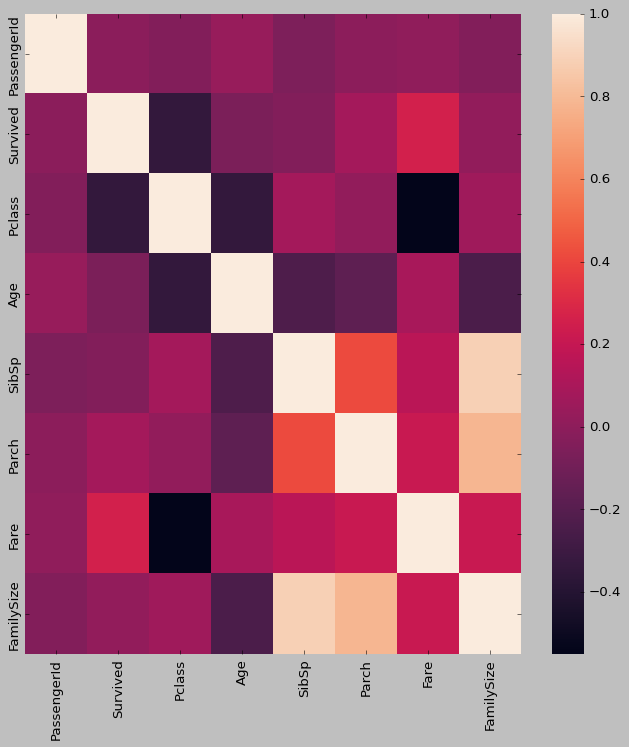

In [34]:
cor = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor)
plt.show()

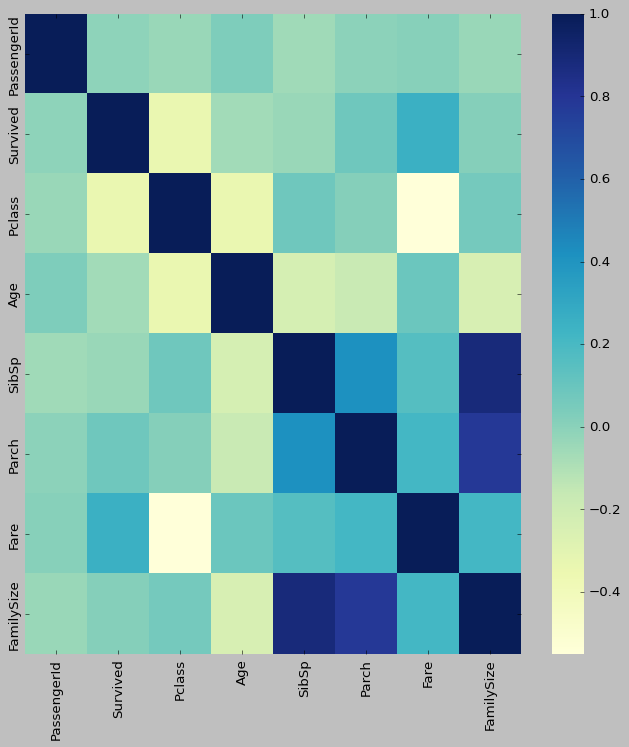

In [35]:
cor = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor, cmap="YlGnBu")
plt.show()

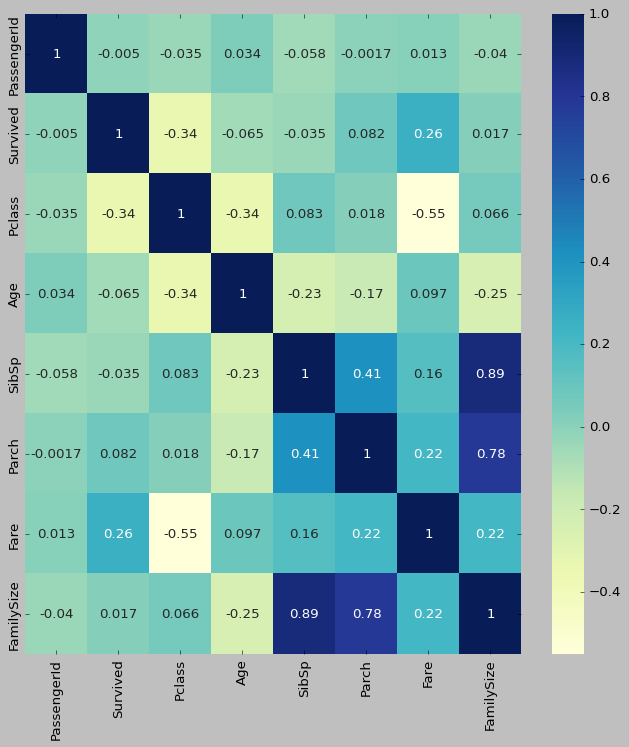

In [36]:
cor = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

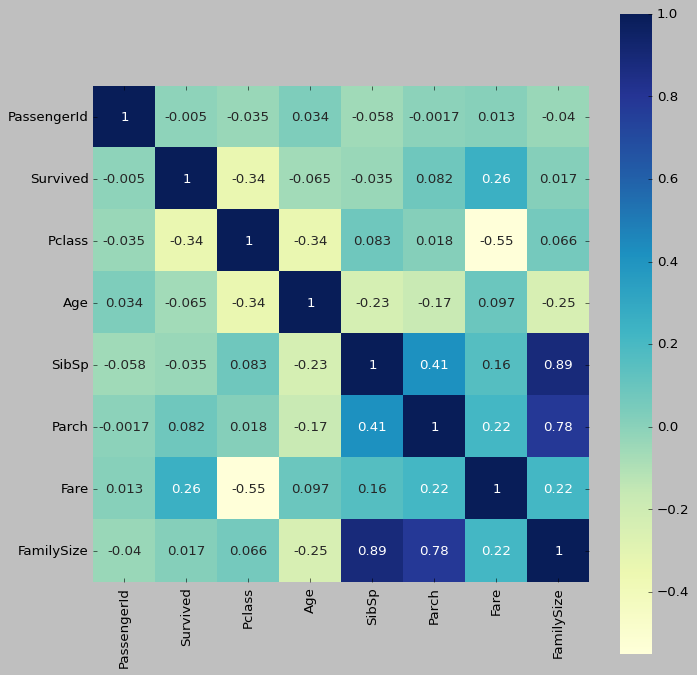

In [37]:
cor = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor, cmap="YlGnBu", annot=True, square=True)
plt.show()

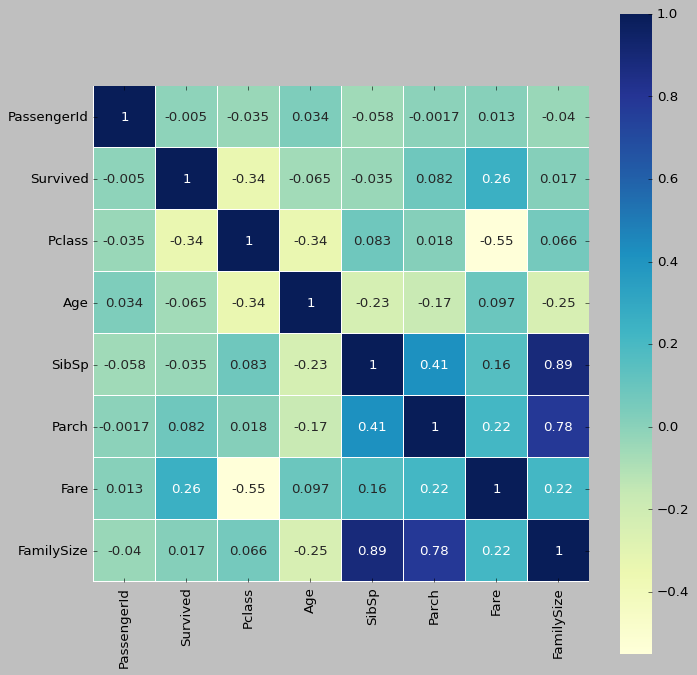

In [38]:
cor = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor, cmap="YlGnBu", annot=True, square=True,linewidth=.01)
plt.show()

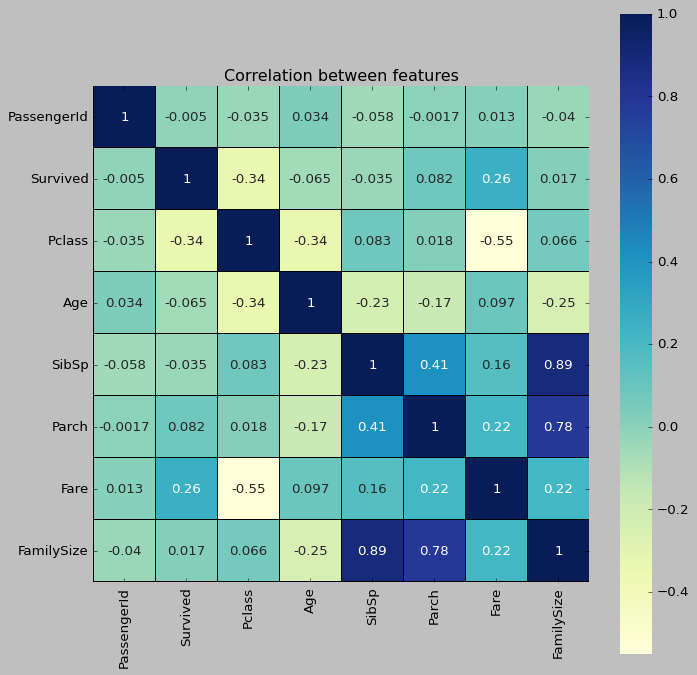

In [39]:
cor = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor, cmap="YlGnBu", annot=True, square=True,linewidth=.01,
           linecolor='black')
plt.title("Correlation between features")
plt.show()

In [40]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'FamilySize', 'GenderClass'],
      dtype='object')

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,male


In [42]:
useless_cols = ['PassengerId', 'Name', 'Sex', 'SibSp','Parch', 'Ticket']
useless_cols

['PassengerId', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket']

In [43]:
df.drop(useless_cols, axis=1, inplace=True)

In [44]:
df.head(3)

,Survived,Pclass,Age,Fare,Embarked,FamilySize,GenderClass
0,0,3,22.0,7.2500,S,2,male
1,1,1,38.0,71.2833,C,2,female
2,1,3,26.0,7.9250,S,1,female


In [45]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Embarked', 'FamilySize',
       'GenderClass'],
      dtype='object')

In [46]:
cat_cols = ['Embarked', 'GenderClass']
cat_cols

['Embarked', 'GenderClass']

In [47]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [48]:
df.head()

,Survived,Pclass,Age,Fare,FamilySize,Embarked_Q,Embarked_S,GenderClass_female,GenderClass_male
0,0,3,22.0,7.2500,2,0,1,0,1
1,1,1,38.0,71.2833,2,0,0,1,0
2,1,3,26.0,7.9250,1,0,1,1,0
3,1,1,35.0,53.1000,2,0,1,1,0
4,0,3,35.0,8.0500,1,0,1,0,1


In [49]:
X = df.loc[ : , df.columns!='Survived' ]
X.head(3)

,Pclass,Age,Fare,FamilySize,Embarked_Q,Embarked_S,GenderClass_female,GenderClass_male
0,3,22.0,7.2500,2,0,1,0,1
1,1,38.0,71.2833,2,0,0,1,0
2,3,26.0,7.9250,1,0,1,1,0


In [50]:
y = df.Survived

In [51]:
df.shape

(891, 9)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

### No data scaling is required for Decision Tree as they are giant if-else conditional statements.

## Modeling

In [54]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
model

DecisionTreeClassifier(random_state=0)

In [55]:
X.columns

Index(['Pclass', 'Age', 'Fare', 'FamilySize', 'Embarked_Q', 'Embarked_S',
       'GenderClass_female', 'GenderClass_male'],
      dtype='object')

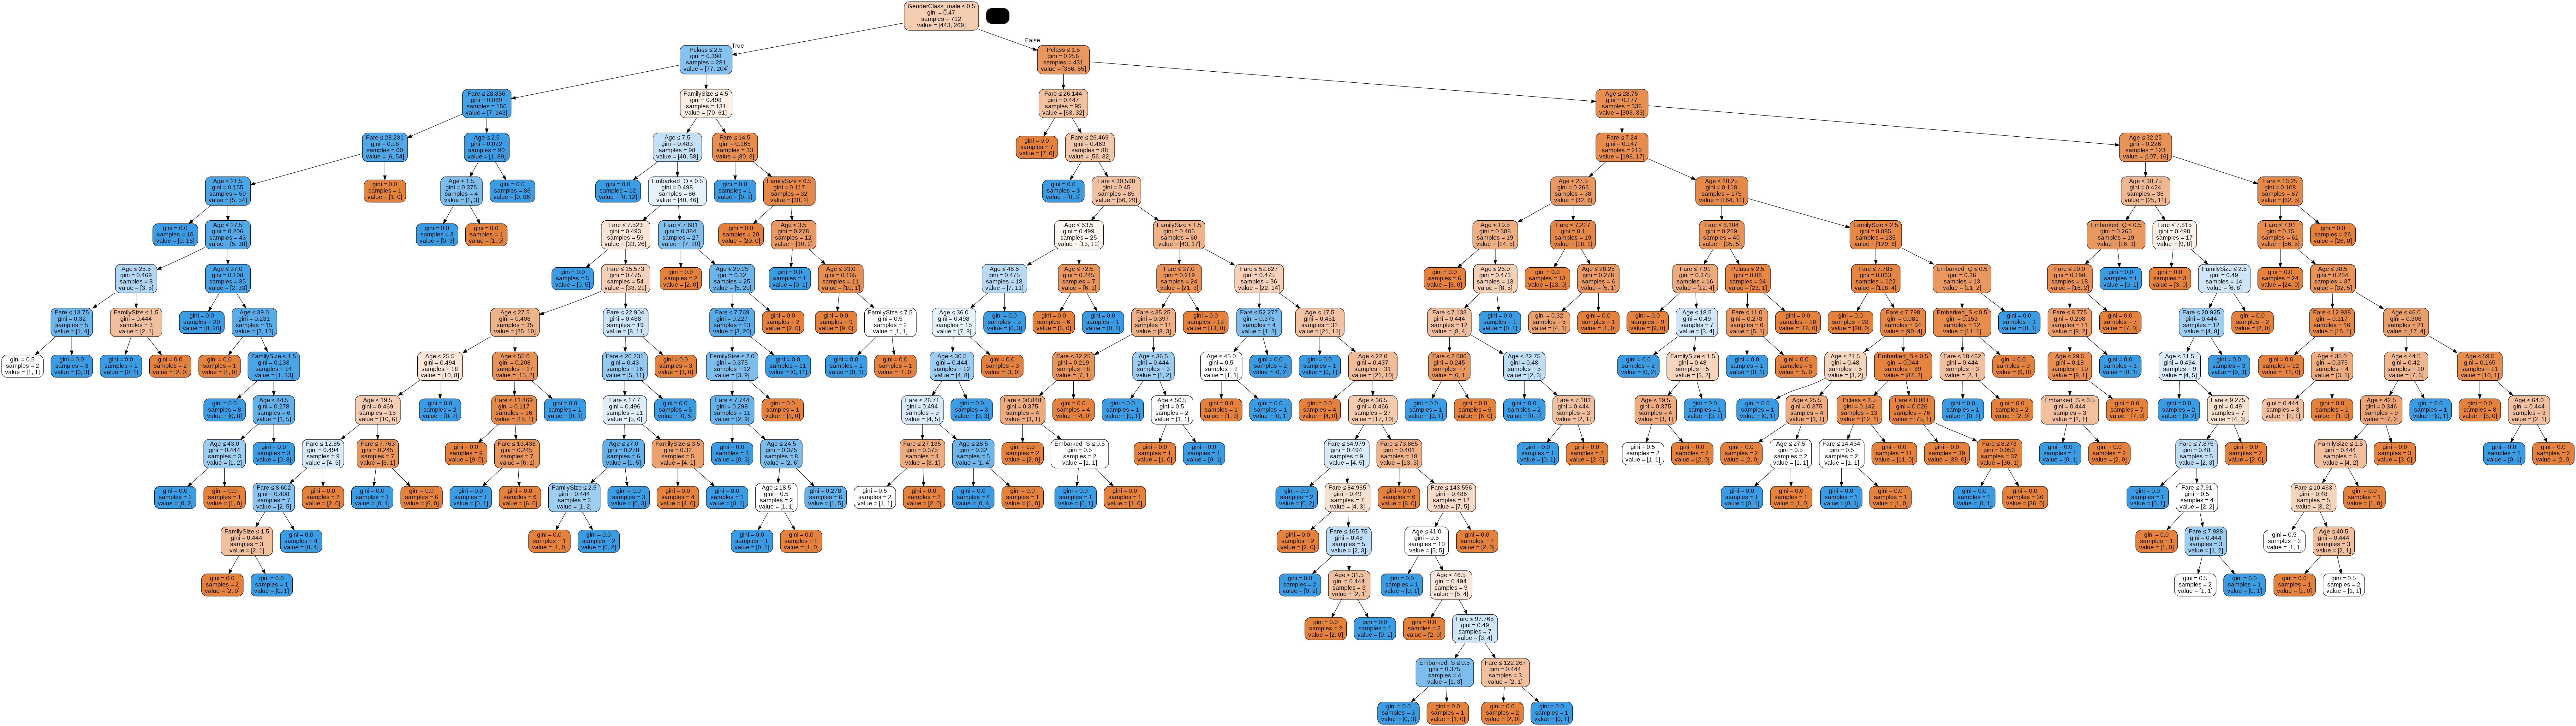

In [56]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Generate a pydot file
dot_tree = export_graphviz(decision_tree=model,
                          filled=True,
                          rounded=True,
                          special_characters=True,
                          feature_names=X.columns)

# Generate graph using pydot file
graph = pydotplus.graph_from_dot_data(dot_tree)

# Display the graph
Image(graph.create_png())
# max_dept=16

In [57]:
from sklearn import tree
print(tree.export_text(model))

|--- feature_7 <= 0.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_2 <= 28.86
|   |   |   |--- feature_2 <= 28.23
|   |   |   |   |--- feature_1 <= 21.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  21.50
|   |   |   |   |   |--- feature_1 <= 27.50
|   |   |   |   |   |   |--- feature_1 <= 25.50
|   |   |   |   |   |   |   |--- feature_2 <= 13.75
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_2 >  13.75
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_1 >  25.50
|   |   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_3 >  1.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_1 >  27.50
|   |   |   |   |   |   |--- feature_1 <= 37.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_1 >  37.00
|   |   |   |   |   |   |   |--- feature_1 <= 39.00
|   

[Text(0.37289663461538464, 0.9705882352941176, 'X[7] <= 0.5\ngini = 0.47\nsamples = 712\nvalue = [443, 269]'),
 Text(0.1622596153846154, 0.9117647058823529, 'X[0] <= 2.5\ngini = 0.398\nsamples = 281\nvalue = [77, 204]'),
 Text(0.06538461538461539, 0.8529411764705882, 'X[2] <= 28.856\ngini = 0.089\nsamples = 150\nvalue = [7, 143]'),
 Text(0.05, 0.7941176470588235, 'X[2] <= 28.231\ngini = 0.18\nsamples = 60\nvalue = [6, 54]'),
 Text(0.04230769230769231, 0.7352941176470589, 'X[1] <= 21.5\ngini = 0.155\nsamples = 59\nvalue = [5, 54]'),
 Text(0.03461538461538462, 0.6764705882352942, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.05, 0.6764705882352942, 'X[1] <= 27.5\ngini = 0.206\nsamples = 43\nvalue = [5, 38]'),
 Text(0.03076923076923077, 0.6176470588235294, 'X[1] <= 25.5\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.015384615384615385, 0.5588235294117647, 'X[2] <= 13.75\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.007692307692307693, 0.5, 'gini = 0.5\nsamples = 2\nv

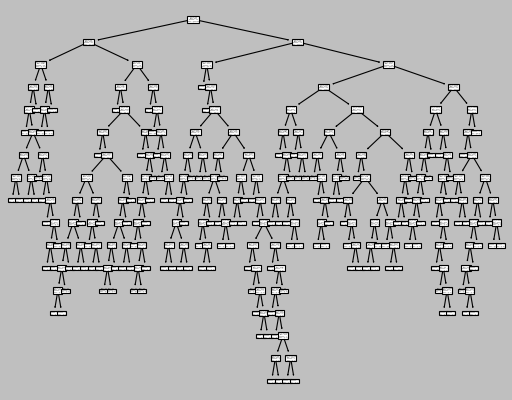

In [58]:
from sklearn import tree
tree.plot_tree(model)

In [59]:
y_pred_test = model.predict(X_test)

y_pred_train = model.predict(X_train)

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [61]:
# Training Acc
accuracy_score(y_train, y_pred_train)

0.9873595505617978

In [62]:
# Testing Acc
accuracy_score(y_test, y_pred_test)

0.7877094972067039

### Model is highly Overfitting.

In [63]:
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[92, 14],
       [24, 49]])

In [64]:
cm = pd.DataFrame(cm)
cm

,0,1
0,92,14
1,24,49


In [65]:
cm.index = ['Actual Died','Actual Survived']
cm

,0,1
Actual Died,92,14
Actual Survived,24,49


In [66]:
cm.columns = ['Predicted Died','Predicted Survived']
cm

,Predicted Died,Predicted Survived
Actual Died,92,14
Actual Survived,24,49


In [67]:
(24+14) / (92+14+24+49) * 100

21.22905027932961

In [68]:
100 - 21.22905027932961

78.77094972067039

In [69]:
(92+49) / (92+14+24+49) * 100

78.77094972067039

## GridSearchCV

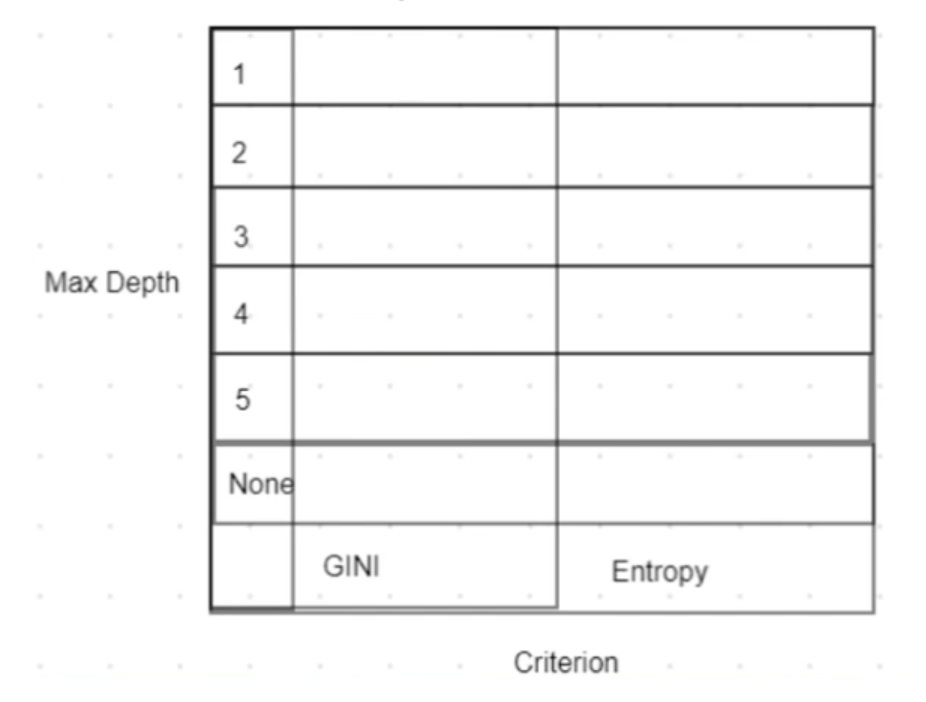

In [70]:
hp_to_be_tuned = {
    "criterion" : ["gini","entropy"],
    "max_depth" : [1,2,3,4,5,None]
}

In [71]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, param_grid=hp_to_be_tuned, cv=10, n_jobs=-1)

In [72]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, None]})

In [73]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [74]:
grid.best_score_

0.8358176838810643

In [75]:
y_pred_test = grid.predict(X_test)

y_pred_train = grid.predict(X_train)

In [76]:
# Training Acc
accuracy_score(y_train, y_pred_train)

0.8384831460674157

In [77]:
# Testing Acc
accuracy_score(y_test, y_pred_test)

0.8044692737430168

## Modeling with parameters obtained from grid

In [82]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state=0, criterion= 'gini', max_depth= 3)
model2.fit(X_train, y_train)
model2

DecisionTreeClassifier(max_depth=3, random_state=0)

In [83]:
X.columns

Index(['Pclass', 'Age', 'Fare', 'FamilySize', 'Embarked_Q', 'Embarked_S',
       'GenderClass_female', 'GenderClass_male'],
      dtype='object')

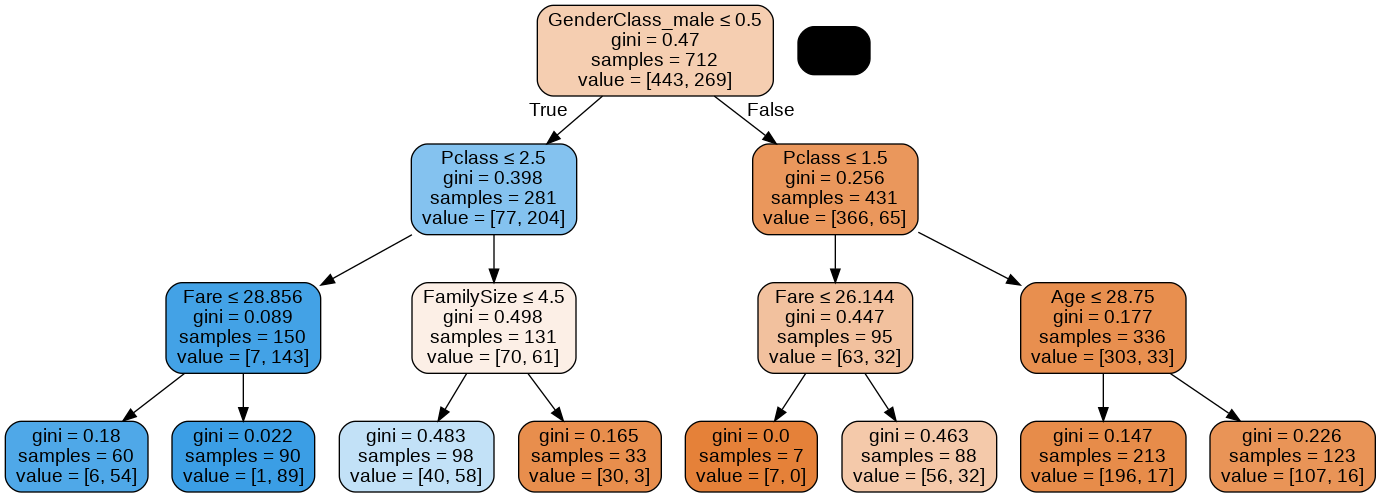

In [84]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Generate a pydot file
dot_tree = export_graphviz(decision_tree=model2,
                          filled=True,
                          rounded=True,
                          special_characters=True,
                          feature_names=X.columns)

# Generate graph using pydot file
graph = pydotplus.graph_from_dot_data(dot_tree)

# Display the graph
Image(graph.create_png())
# max_dept=16

In [86]:
hp_to_be_tuned2 = {
    "criterion" : ["gini","entropy"],
    "max_depth" : [1,2,3,4,5,6,7,None],
    "min_samples_split" : [1,2,3,4,5,6,7,None],
    "min_samples_leaf" : [1,2,3,4,5,6,7,None]
}

In [89]:
from sklearn.model_selection import GridSearchCV
grid2 = GridSearchCV(model, param_grid=hp_to_be_tuned2, cv=10, n_jobs=-1, verbose=True)

In [90]:
grid2.fit(X_train, y_train)

Fitting 10 folds for each of 1024 candidates, totalling 10240 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, None],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, None]},
             verbose=True)

In [91]:
grid2.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [92]:
grid2.best_score_

0.8358176838810643

In [93]:
y_pred_test = grid2.predict(X_test)

y_pred_train = grid2.predict(X_train)

In [94]:
# Training Acc
accuracy_score(y_train, y_pred_train)

0.8384831460674157

In [95]:
# Testing Acc
accuracy_score(y_test, y_pred_test)

0.8044692737430168

## Modeling with parameters obtained from grid

In [96]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(random_state=0, criterion= 'gini', max_depth= 3,
                                min_samples_leaf=1, min_samples_split= 2)
model3.fit(X_train, y_train)
model3

DecisionTreeClassifier(max_depth=3, random_state=0)

In [97]:
X.columns

Index(['Pclass', 'Age', 'Fare', 'FamilySize', 'Embarked_Q', 'Embarked_S',
       'GenderClass_female', 'GenderClass_male'],
      dtype='object')

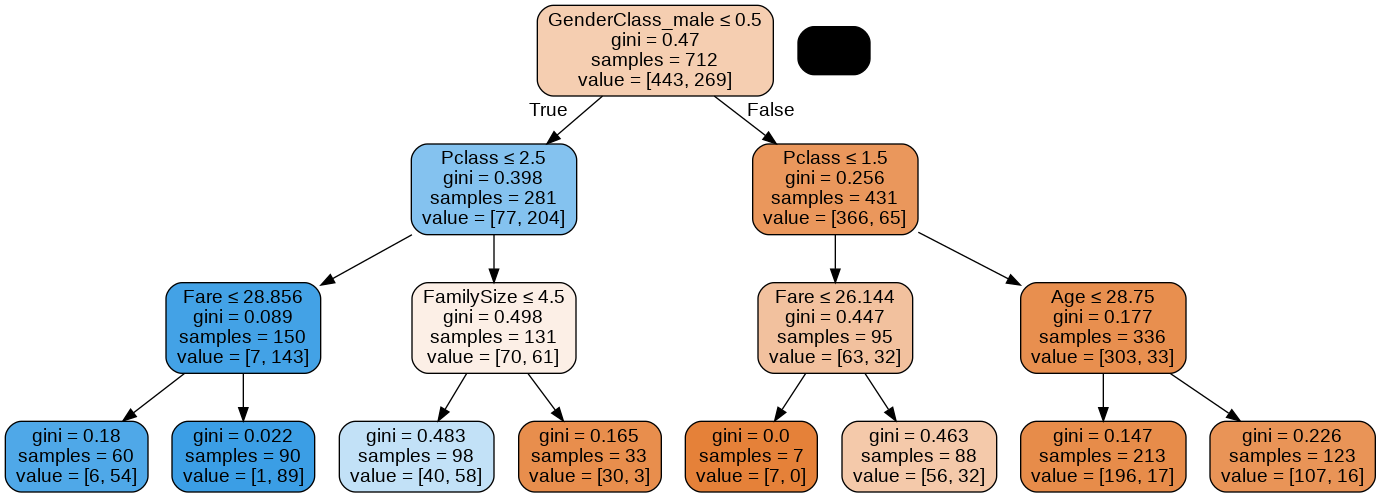

In [98]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Generate a pydot file
dot_tree = export_graphviz(decision_tree=model3,
                          filled=True,
                          rounded=True,
                          special_characters=True,
                          feature_names=X.columns)

# Generate graph using pydot file
graph = pydotplus.graph_from_dot_data(dot_tree)

# Display the graph
Image(graph.create_png())


In [99]:
y_pred_test = model3.predict(X_test)

y_pred_train = model3.predict(X_train)

In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [101]:
# Training Acc
accuracy_score(y_train, y_pred_train)

0.8384831460674157

In [102]:
# Testing Acc
accuracy_score(y_test, y_pred_test)

0.8044692737430168

# Happy Learning